In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

#pre - Processing class just like a library
class StandardScaler(object):
    def __init__(self):
        pass

    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.scale_ = np.std(X - self.mean_, axis=0)
        return self

    def transform(self, X):
        return (X - self.mean_) / self.scale_

    def fit_transform(self, X):
        return self.fit(X).transform(X)

In [ ]:
class convers_pca():
    def __init__(self, no_of_components):
        self.no_of_components = no_of_components
        self.eigen_values = None
        self.eigen_vectors = None

    def transform(self, x):
        return np.dot(x - self.mean, self.projection_matrix.T)

    def inverse_transform(self, x):
        return np.dot(x, self.projection_matrix) + self.mean

    def fit(self, x):
        self.no_of_components = x.shape[1] if self.no_of_components is None else self.no_of_components
        self.mean = np.mean(x, axis=0)

        cov_matrix = np.cov(x - self.mean, rowvar=False)

        self.eigen_values, self.eigen_vectors = np.linalg.eig(cov_matrix)
        self.eigen_vectors = self.eigen_vectors.T

        self.sorted_components = np.argsort(self.eigen_values)[::-1]
        #self.sorted_components = self.eigen_values.argsort()[::-1]

        #self.projection_matrix = self.eigen_vectors[:,self.sorted_components][:,:self.no_of_components]
        self.projection_matrix = self.eigen_vectors[self.sorted_components[:self.no_of_components]]
        self.explained_variance = self.eigen_values[self.sorted_components]
        self.explained_variance_ratio = self.explained_variance / self.eigen_values.sum()
        return self




In [ ]:
X, y  = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame = True)

In [ ]:
display(X.shape,y.shape)

(70000, 784)

(70000,)

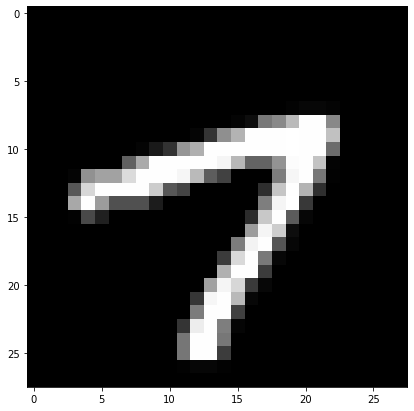

7


In [ ]:
# display or plot a number.
plt.figure(figsize=(7,7))
idx = 101

grid_data = X.iloc[idx].values.reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(y[idx])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


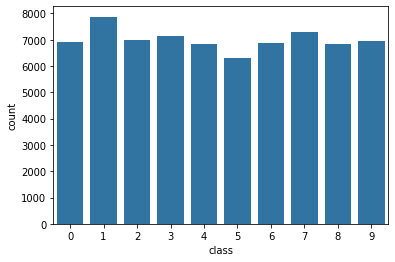

In [ ]:
sns.countplot(y, color = sns.color_palette()[0]);

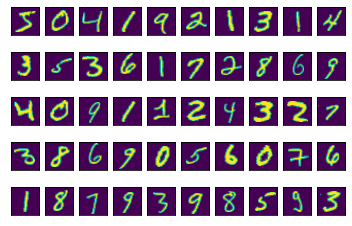

In [ ]:
def show_images(num_images):
    if num_images % 10 == 0 and num_images <= 100:
        for digit_num in range(0,num_images):
            plt.subplot(num_images/10,10,digit_num+1) #create subplots
            mat_data = X.iloc[digit_num].values.reshape(28,28)  #reshape images
            plt.imshow(mat_data) #plot the data
            plt.xticks([]) #removes numbered labels on x-axis
            plt.yticks([]) #removes numbered labels on y-axis
show_images(50)

In [ ]:
indices = np.where(y == '1')
indices

(array([    3,     6,     8, ..., 69978, 69984, 69994]),)

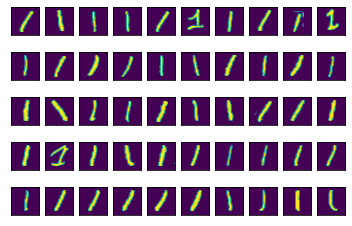

In [ ]:
def show_images_by_digit(digit_to_see):
    if int(digit_to_see) in list(range(10)):
        indices = np.where(y == digit_to_see) # pull indices for num of interest
        for digit_num in range(0,50):
            plt.subplot(5,10, digit_num+1) #create subplots
            #reshape images
            mat_data = X.iloc[indices[0][digit_num]].values.reshape(28,28)
            plt.imshow(mat_data) #plot the data
            plt.xticks([]) #removes numbered labels on x-axis
            plt.yticks([]) #removes numbered labels on y-axis
show_images_by_digit('1')

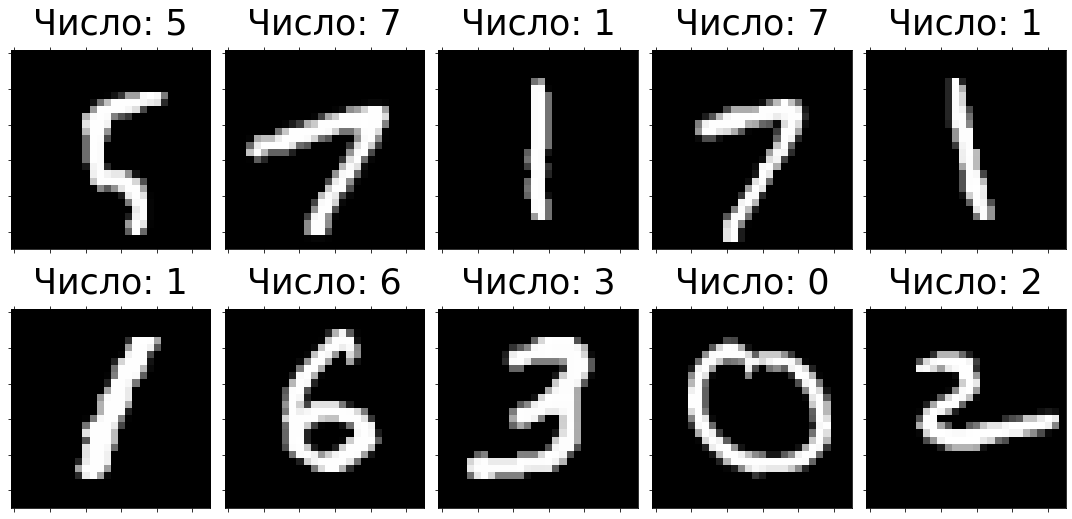

In [ ]:
# создаем полотно
n=100
fig = plt.figure( figsize=(15,8) )
# на котором визуализируем 10 примеров изображений
# начиная с индекса n
for i in range(0,10):
    # каждое изображение будет на своем сабплоте
    ax = fig.add_subplot(2,5,i+1)
    # пишем какое число должно быть
    ax.set_title("Число: {}".format(str(y[i+n]) ), size=35)
    # отрисовываем с помощью функции matshow
    # для этого нам вектор-строку из 784 элементов
    # нужно преобразовать в матрицу 28 на 28
    ax.matshow(1-X.loc[i+n,'pixel1':'pixel784'].values.reshape((28,28)).astype(float),
                cmap='Greys')
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    plt.tight_layout()


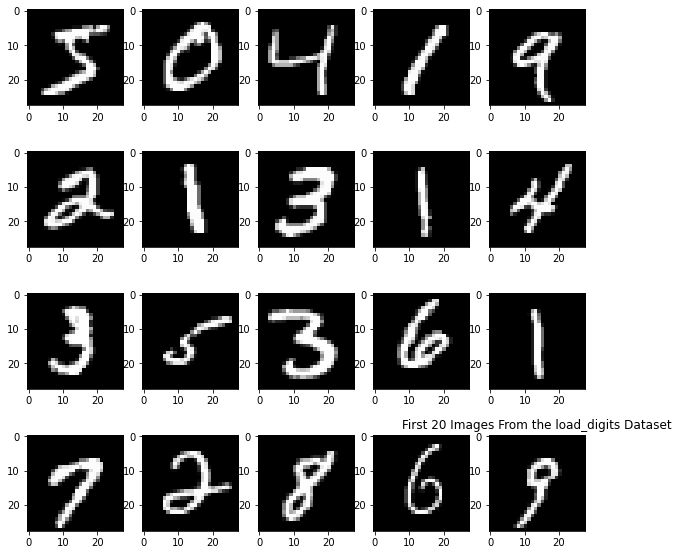

In [ ]:
# Display the first 20 images
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(10,10))
for n in range(20):
    i = n //5
    j = n%5
    ax = axes[i][j]
    ax.imshow(X.iloc[n].values.reshape(28,28), cmap=plt.cm.gray)
plt.title('First 20 Images From the load_digits Dataset');

In [ ]:
#X1=X.values

In [ ]:
transformed=StandardScaler().fit_transform(X)

In [ ]:
#std = StandardScaler()
#transformed = StandardScaler().fit_transform(X)

In [ ]:
standardized_data = np.nan_to_num(transformed)

In [ ]:
#pca = convers_pca(no_of_components=2)
#pca.fit(standardized_data)

In [ ]:
pca = convers_pca(no_of_components=784)
pca.fit(standardized_data)

In [ ]:
len(pca.explained_variance_ratio)

784

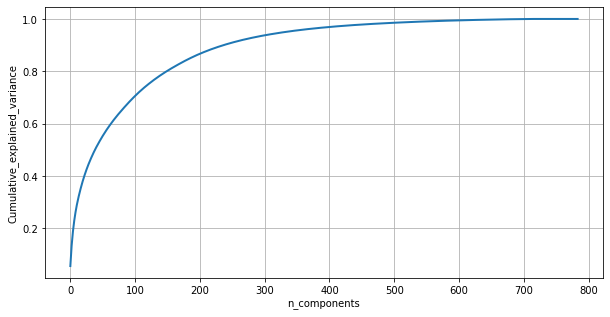

In [ ]:
#pca.n_components = 784
pca = convers_pca(no_of_components=784)
pca.fit(standardized_data)
#pca_data = pca.fit(standardized_data)

percentage_var_explained = pca.explained_variance/ np.sum(pca.explained_variance);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(10, 5))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 200-dimensions, approx. 90% of variance is expalined.

In [ ]:
feat_var_list = list(zip(range(1,784), pca.explained_variance_ratio.cumsum()))

for item in feat_var_list:
  if item[1] > 0.95:
      print(item)


(332, 0.9500311796713801)
(333, 0.950388112842585)
(334, 0.9507435662155342)
(335, 0.9510977901338151)
(336, 0.9514496546991931)
(337, 0.951799252976366)
(338, 0.9521451475481619)
(339, 0.9524899136885976)
(340, 0.9528303922231262)
(341, 0.953166478964344)
(342, 0.9534998389931482)
(343, 0.9538317204702403)
(344, 0.9541606490897725)
(345, 0.9544849151414383)
(346, 0.9548052265353223)
(347, 0.9551246192603094)
(348, 0.9554417797206339)
(349, 0.9557549074163111)
(350, 0.9560663548913196)
(351, 0.9563768508987084)
(352, 0.9566855293451623)
(353, 0.9569918180060822)
(354, 0.9572968362163797)
(355, 0.9575996093237926)
(356, 0.9578990395837081)
(357, 0.9581975628079052)
(358, 0.9584937802115711)
(359, 0.9587839947002145)
(360, 0.959072948510549)
(361, 0.9593593351233497)
(362, 0.9596444416909833)
(363, 0.9599279161433506)
(364, 0.960209912328411)
(365, 0.9604905801195986)
(366, 0.9607704152912495)
(367, 0.9610482839815172)
(368, 0.9613236856058912)
(369, 0.9615984384462672)
(370, 0.961872637

In [ ]:
pca.eigen_values[:10]

array([40.57172851, 29.05682915, 26.87856923, 20.80096479, 18.12446406,
       15.76465278, 13.76388424, 12.51569535, 11.01690489, 10.03800569])

In [ ]:
pca.explained_variance[:10]

array([40.57172851, 29.05682915, 26.87856923, 20.80096479, 18.12446406,
       15.76465278, 13.76388424, 12.51569535, 11.01690489, 10.03800569])

In [ ]:
pca.eigen_vectors

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

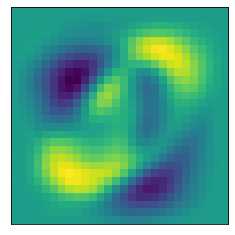

In [ ]:
def plot_component(pca, comp):
    if comp <= len(pca.eigen_vectors):
        mat_data = np.asmatrix(pca.eigen_vectors[comp]).reshape(28,28)  #reshape images
        plt.imshow(mat_data); #plot the data
        plt.xticks([]) #removes numbered labels on x-axis
        plt.yticks([]) #removes numbered labels on y-axis
plot_component(pca, 1)

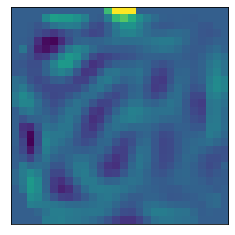

In [ ]:
plot_component(pca, 50)

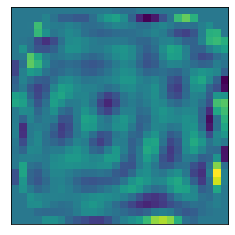

In [ ]:
plot_component(pca, 100)

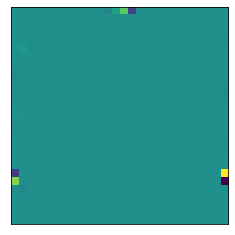

In [ ]:
plot_component(pca, 150)

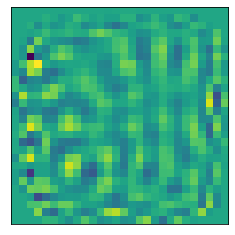

In [ ]:
plot_component(pca, 200)

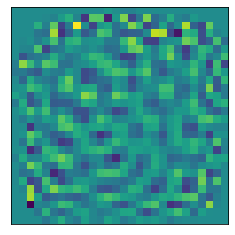

In [ ]:
plot_component(pca, 300)

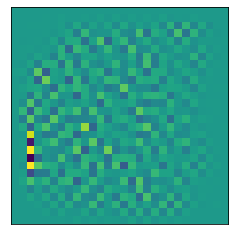

In [ ]:
plot_component(pca, 700)

Note that these images are associated with the index of the Principal Components, and the first principal component just happened to be the first (0th) item in the list

In [ ]:
pca=PCA(n_components=332)

In [ ]:
pca.fit(standardized_data)

PCA(n_components=332)

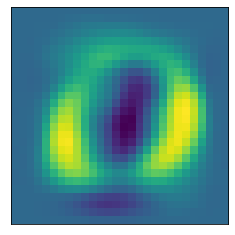

In [ ]:
def plot_component(pca, comp):
    if comp <= len(pca.components_):
        mat_data = np.asmatrix(pca.components_[comp]).reshape(28,28)  #reshape images
        plt.imshow(mat_data); #plot the data
        plt.xticks([]) #removes numbered labels on x-axis
        plt.yticks([]) #removes numbered labels on y-axis
plot_component(pca, 0)

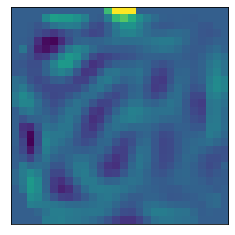

In [ ]:
plot_component(pca, 50)

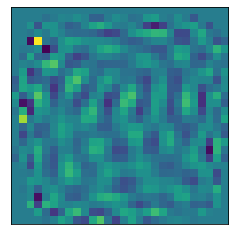

In [ ]:
plot_component(pca, 200)

In [ ]:
pca=PCA(n_components=15)
pca.fit(standardized_data)

PCA(n_components=15)

In [ ]:
pca.explained_variance_ratio_

array([0.05642719, 0.04041226, 0.03738273, 0.02893   , 0.02520752,
       0.02192549, 0.0191428 , 0.01740683, 0.0153223 , 0.01396075,
       0.01342164, 0.01201094, 0.0111364 , 0.01090189, 0.01027306])

In [ ]:
pca.explained_variance_ratio_.sum()

0.3338618069954328

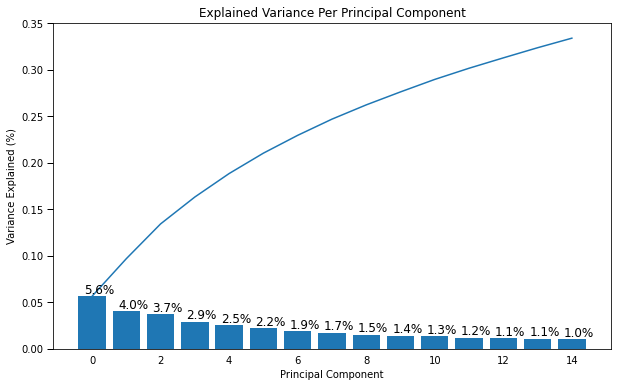

In [ ]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_

    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(round(vals[i]*100,1))[:3])), (ind[i]+0.2, vals[i]),
                    va="bottom",
                    ha="center",
                    fontsize=12)

    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=1, length=6)

    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
scree_plot(pca)

In [ ]:
pca = PCA()
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(standardized_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (70000, 2)


In [ ]:
pca.explained_variance_ratio_

array([0.05642719, 0.04041226])

In [ ]:
pca.explained_variance_ratio_.sum()

0.09683944777885026

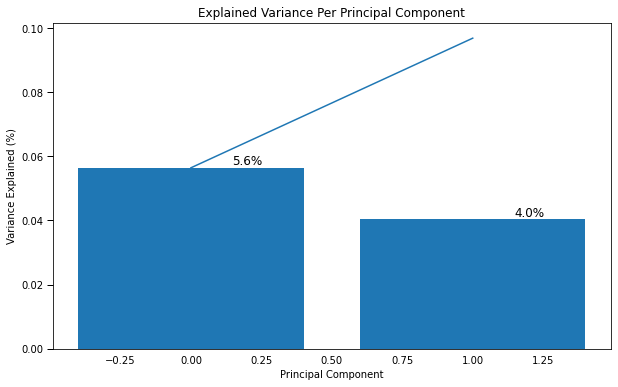

In [ ]:
scree_plot(pca)

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


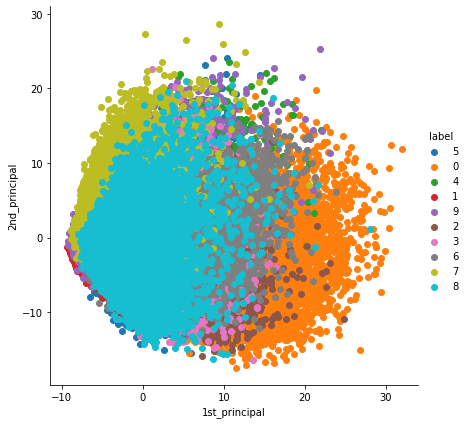

In [ ]:
# attaching the label for each 2-d data point
pca_data = np.vstack((pca_data.T, y)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sns.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

наша функция

In [ ]:
pca=convers_pca(no_of_components=2)
pca.fit(standardized_data)
pca.explained_variance_ratio.sum()

0.0968394477878165

In [ ]:
pca_data

array([[-0.8917430296834691, -4.929670307289462, '5'],
       [8.813510110539724, -7.51741246057928, '0'],
       [2.204798618497859, 9.824095834818847, '4'],
       ...,
       [-5.2225810991263275, -1.184413471583695, '4'],
       [-2.177690682779048, -6.995168413892234, '5'],
       [11.7778744027374, -5.402866788537446, '6']], dtype=object)

In [ ]:
pca_data[:, 0]

array([-0.8917430296834691, 8.813510110539724, 2.204798618497859, ...,
       -5.2225810991263275, -2.177690682779048, 11.7778744027374],
      dtype=object)

In [ ]:
np.array(list(set(y.astype(int))))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

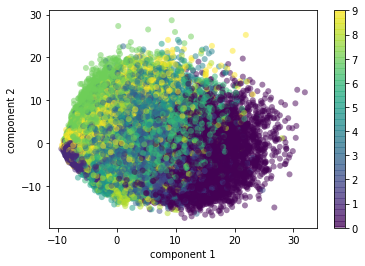

In [ ]:
plt.scatter(pca_data[:, 0], pca_data[:, 1],
            c=y.astype(int), edgecolor='none', alpha=0.5,
            )
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

для нестандартизованых данных

In [ ]:
pca = PCA()
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(X)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (70000, 2)


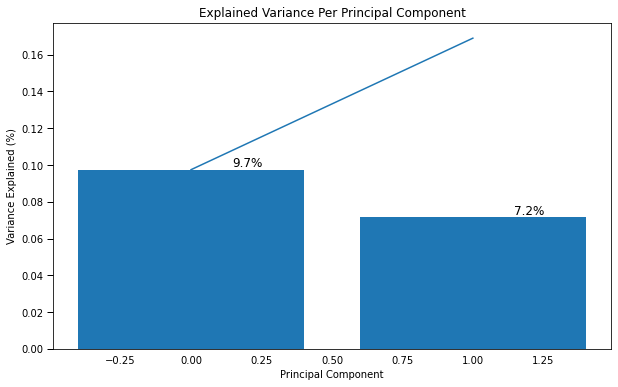

In [ ]:
scree_plot(pca)

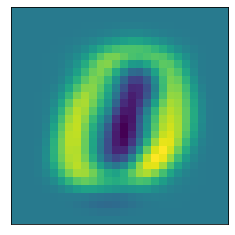

In [ ]:
plot_component(pca, 0)

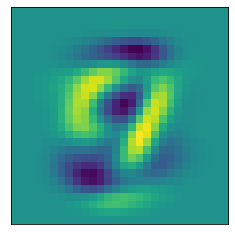

In [ ]:
plot_component(pca, 1)

In [ ]:
plot_component(pca, 3) # n_components=2

CPU times: user 4.43 s, sys: 1.74 s, total: 6.17 s
Wall time: 3.33 s


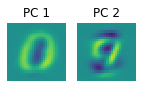

In [ ]:
%%time
n_components = 2
pca = PCA(n_components=n_components)
pca.fit(X)
fig = plt.figure(figsize=(n_components*np.power(n_components, 1/5),3))
axes = []
for i in range(n_components):
    ax_ = fig.add_subplot(1, n_components, i+1)
    ax_.imshow(pca.components_[i].reshape(28,28), interpolation='nearest', clim=(-.15, .15));
    ax_.set_title(f'PC {i+1}')
    ax_.axis('off')

    axes.append(ax_)

In [ ]:


from IPython.display import HTML, display
import tabulate
table = [["data","  X","standardized_(X)"],
         ["var_explained",0.097,0.072],
         ["var explained",0.056,0.04]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

data,X,standardized_(X)
var_explained,0.097,0.072
var explained,0.056,0.04


почему так произошло не понял ,на самом деле для стандартизованных данных
"variance" должно было меньше так как мы максимизируем их

CPU times: user 5.27 s, sys: 1.91 s, total: 7.17 s
Wall time: 3.98 s


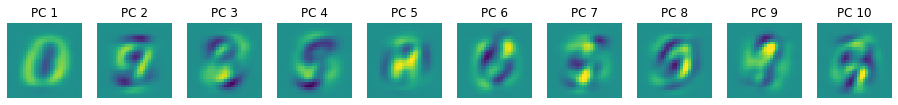

In [ ]:
%%time
n_components = 10
pca = PCA(n_components=n_components)
pca.fit(X)
fig = plt.figure(figsize=(n_components*np.power(n_components, 1/5),3))
axes = []
for i in range(n_components):
    ax_ = fig.add_subplot(1, n_components, i+1)
    ax_.imshow(pca.components_[i].reshape(28,28), interpolation='nearest', clim=(-.15, .15));
    ax_.set_title(f'PC {i+1}')
    ax_.axis('off')

    axes.append(ax_)

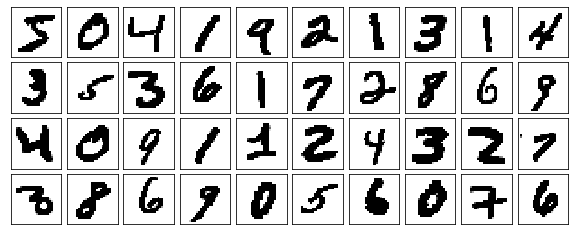

In [ ]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28,28),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(X.values)

In [ ]:
pca = PCA(0.95).fit(standardized_data)
pca.n_components_

332

как выше выдели

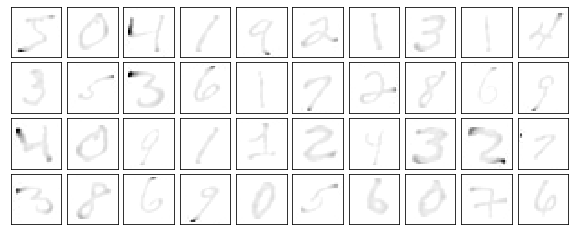

In [ ]:
components = pca.transform(standardized_data)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

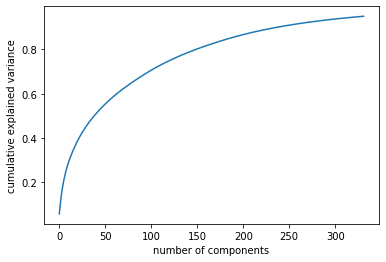

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');